In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


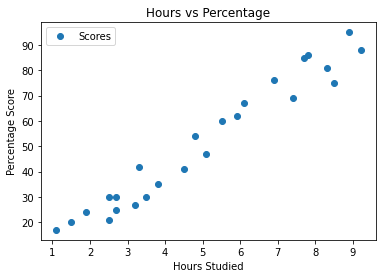

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [5]:
X = s_data.iloc[:, :-1].values  #selecting until last coloumn
y = s_data.iloc[:, 1].values     # selcting last coloumn

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state= 0)

In [7]:
def gradient_descent(m,c,l_rate,iter_val,X_train,y_train):
    for i in range(iter_val):
        m_slope = 0
        c_intercept =  0
        n = float(len(X_train))
        
    for i in range(len(X_train)):
        c_intercept += -(2/n) * (y_train[i] - ((m * X_train[i]) + c))
        m_slope += -(2/n) * X_train[i]*(y_train[i] - ((m * X_train[i]) + c))
        
    final_m = m - (m_slope * l_rate)
    final_c = c - (c_intercept * l_rate)
    m =final_m
    c = final_c
    
    
    return m, c
    

In [8]:
def mse_calc(slope, intercept, X_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(X_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*X_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*X_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(X_train))
    return error, pred


In [9]:
m, c= gradient_descent(0 ,0 , 0.015, 1000 , X_train, y_train)
print(m,c)
final_e_value, prediction = mse_calc(m, c, X_test, y_test)
print(prediction)
print(X_train)
print(X_test)

[10.3179] [1.6185]
[array([17.09535]), array([34.63578]), array([77.97096]), array([27.41325]), array([62.49411])]
[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


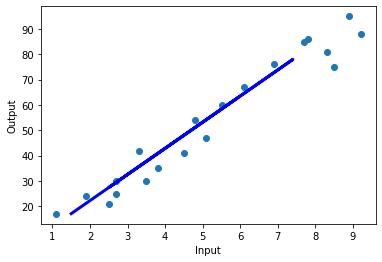

In [10]:
plt.scatter(X_train, y_train)
plt.plot(X_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [11]:
# Comparing Actual vs Predicted
print(y_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
df 

[20 27 69 30 62]


,Actual,Predicted
0,20,[17.095350000000003]
1,27,[34.635780000000004]
2,69,[77.97096000000002]
3,30,[27.413250000000005]
4,62,[62.49411000000001]


In [12]:
X_test = 9.25
pred = ((m * X_test) + c)  
print(pred[0])

97.059075
